In [3]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC #调用模型
from sklearn import datasets #调用数据集
from sklearn import model_selection
from sklearn.metrics import mean_squared_error as mse 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)#设置随机种子
mpl.rc("axes",labelsize=14) # rc方法可以一次修改一个参数的多属性值
mpl.rc("xtick",labelsize=14)
mpl.rc("ytick",labelsize=14)
mpl.rcParams # 默认参数

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [4]:
iris = datasets.load_iris() #加载鸢尾花数据集
# iris共有三个类别，取setosa（y=0）和versicolor（y=1）两个类别进行二分类。
x = iris["data"][:, (2, 3)]  # 花瓣宽度、花瓣长度
y = iris["target"] # 标签
# 将数据集中标签为1和0的数据提取出来分别将数据放在X中，标签放在y中
setosa_or_versicolor = (y == 0) | (y == 1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]
iris.keys(),iris.feature_names
# 对数据进行划分
data_train, data_test, tag_train, tag_test = model_selection.train_test_split(
    x, y, test_size=0.25, random_state=100)

In [5]:
data_train,len(data_train)
data_test,len(data_test)
tag_train,tag_test

(array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0]))

In [6]:
iris.keys() # 查看分类
pd.DataFrame(data=iris.data,columns=iris.feature_names) #查看数据

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#SVM Classifier model，核函数选择线性，惩罚参数为正无穷，
# 即选择让所有样本点都满足条件
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(data_train, tag_train)

y_pre_train = svm_clf.predict(data_train)
y_pre_test = svm_clf.predict(data_test)
mse(tag_train, y_pre_train),mse(tag_test, y_pre_test)  # 分别计算训练集和测试集的均方差

(0.0, 0.0)

In [8]:
print('w =', svm_clf.coef_[0])
print('b =',svm_clf.intercept_[0])

w = [1.29411744 0.82352928]
b = -3.7882347112962464


In [9]:
#设置的三条直线
x0 = np.linspace(0, 5.5, 200) # 在0到5.5的范围内返回200个等间隔的数
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

#函数作用：绘制分界超平面和边界距离
#使支持向量机的权重等于w，偏置等于b，黑色的实线表示决策边界，黑色虚线表示最近点的样本的位置
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0] # w是SVM分类的权重
    b = svm_clf.intercept_[0] # b是偏置

    # 在决策边界, w0*x0 + w1*x1 + b = 0  => x1 = -w0/w1 * x0 - b/w1，两个变量
    x0 = np.linspace(xmin, xmax, 200) # 在最大值和最小值之间创建一个200个值得等差数列
    # SVM分类超平面
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # 边界距离
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    # svs为训练得到的支持向量点
    svs = svm_clf.support_vectors_
    #使用scatter()函数，并向它传递一对x和y坐标，它将在指定位置绘制一个点
    #这里实际上是绘制出了所有支持向量对应的点
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') #s vs[:, 0], svs[:, 1],获取数据
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #画出分割线
    plt.plot(x0, gutter_up, "k--", linewidth=2, label="gutter_up") #两条黑色的虚线画出gutter_up和gutter_down
    plt.plot(x0, gutter_down, "r--", linewidth=2, label='gutter_down')

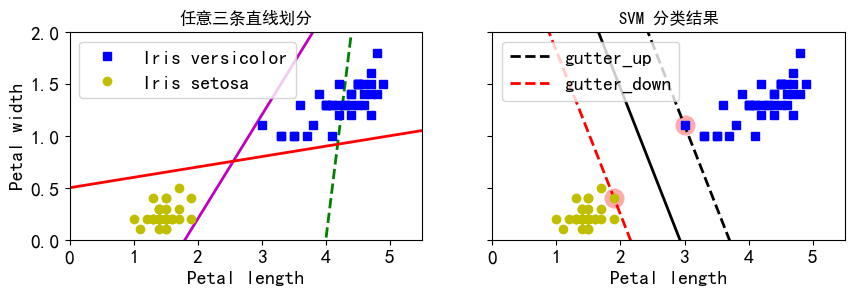

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)
# fig：可以对整个画布再进行配置，ncols=2表示两列， 共享y轴信息
# axes：子画布的信息
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

#第一个图片
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)#pred_1用绿色的虚线
plt.plot(x0, pred_2, "m-", linewidth=2)#pred_2粉紫色的实线
plt.plot(x0, pred_3, "r-", linewidth=2)#pred_3红色的实线
plt.plot(data_train[:, 0][tag_train==1], data_train[:, 1][tag_train==1], "bs", label="Iris versicolor")#设置标签
#X[:, 0][y==1]y=1的横坐标, X[:, 1][y==1]y=1的纵坐标
plt.plot(data_train[:, 0][tag_train==0], data_train[:, 1][tag_train==0], "yo", label="Iris setosa")#非Virginica(y=0)和Viginica(y=1)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("任意三条直线划分")
plt.axis([0, 5.5, 0, 2])

#第二个图片;线性分类器的结果
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)#调用函数
plt.plot(data_train[:, 0][tag_train==1], data_train[:, 1][tag_train==1], "bs")#“bs”蓝色的方块
plt.plot(data_train[:, 0][tag_train==0], data_train[:, 1][tag_train==0], "yo")#“yo”黄色的圆圈
plt.xlabel("Petal length", fontsize=14)
plt.title("SVM 分类结果")
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

(-2.0, 2.0, -2.0, 2.0)

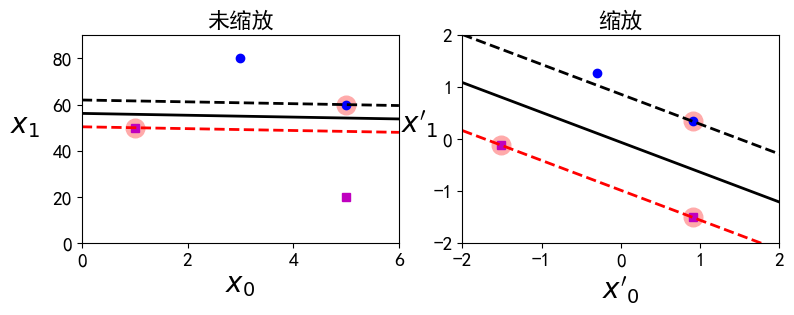

In [11]:
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
#生成一组数据
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)#定义啥样长啥样
ys = np.array([0, 0, 1, 1])#定义类别
#设置svm
svm_clf = SVC(kernel="linear", C=100)
#利用svn进行训练
svm_clf.fit(Xs, ys)
#画未缩放的图（和上面所示的图一样，代码也一样）

plt.figure(figsize=(9,2.7))

#图1:未进行特征缩放
plt.subplot(121)
#画出点，标签为1的用蓝色的点表示，标签为0的用紫红色的方块表示
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)#调用上面的函数最大值设为6，最小值设为0，有设置坐标的长度的感觉
#为x轴，y轴，图标添加标签
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("未缩放", fontsize=16)
plt.axis([0, 6, 0, 90])

#进行缩放
from sklearn.preprocessing import StandardScaler # 去均值和方差归一化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)#将Xs进行缩放

#图2：进行特征缩放后的图
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")#X_scaled 是唯一的变化
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("缩放", fontsize=16)
plt.axis([-2, 2, -2, 2])

In [12]:
#生成两个异常的点
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])#数据特征
y_outliers = np.array([0, 0])#数据对应的标签
#将这两个异常点加在原数据中
Xo1 = np.concatenate([data_train, X_outliers[:1]], axis=0)#按列进行拼接
yo1 = np.concatenate([tag_train, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([data_test, X_outliers[1:]], axis=0)
yo2 = np.concatenate([tag_test, y_outliers[1:]], axis=0)
#设置模型
svm_clf2 = SVC(kernel="linear", C=10**9)#注意：软间隔和硬间隔之间的差距好像是C的大小
#用训练数据拟合分类器模型 
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

(0.0, 5.5, 0.0, 2.0)

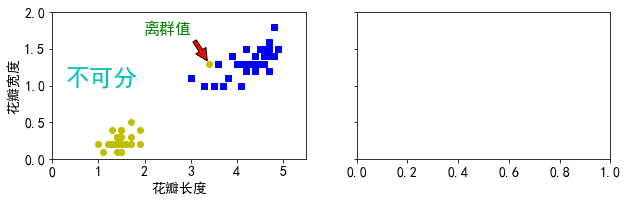

In [11]:
#需要绘制两张图
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)
#绘制第一张图
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")#将Virginica(y=1)用蓝色方块画出
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")#将非Virginica(y=0)用黄色圆点画出
plt.text(0.3, 1.0, "不可分", fontsize=24, color="c")#添加一个字符
plt.xlabel("花瓣长度", fontsize=14)
plt.ylabel("花瓣宽度", fontsize=14)

plt.annotate("离群值",
             xy=(X_outliers[0][0], X_outliers[0][1]),#xy获取离群值的坐标
             xytext=(2.5, 1.7),#写字的位置
             ha="center",#纵向区中对齐
             arrowprops=dict(facecolor='r', shrink=0.1),#设置箭头
             fontsize=16,
             color='g'
            )
plt.axis([0, 5.5, 0, 2])

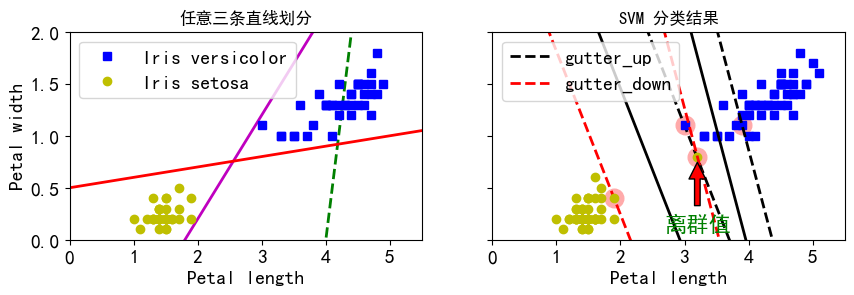

In [13]:

#画第二张图片
plt.sca(axes[1])
#画点
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")#X[:, 0][y==1]y=1的横坐标, X[:, 1][y==1]y=1的纵坐标
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)#调用软间隔分类器
plt.xlabel("Petal length", fontsize=14)#设置x轴的坐标
plt.annotate("离群值",#标注的内容
             xy=(X_outliers[1][0], X_outliers[1][1]),#标注的位置
             xytext=(3.2, 0.08),#标注的文字坐标
             ha="center",#中心
             arrowprops=dict(facecolor='r', shrink=0.1),#箭头参数，箭头颜色，shrink=0.1总长度的一部分，
             # 从两端收缩
             fontsize=16,#字体大小
             color='g'
            )
plt.axis([0, 5.5, 0, 2])

#save_fig("sensitivity_to_outliers_plot")
plt.show()

In [ ]:
## 

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #特征标准化
from sklearn.svm import LinearSV C#使用线性模型

#导入数据
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 支取数据集中的花瓣的长度和宽度两个特征
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica，如果是第二种就输出为1，否则为0
# 简单来说，Pipeline可以将许多算法模型串联起来，比如将特征提取、归一化、
#分类组织在一起形成一个典型的机器学习问题工作流
svm_clf = Pipeline([
        ("scaler", StandardScaler()),#先正则化
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    #loss="hinge"标准SVM损失，正则化程度于c呈反比
    ])
#训练模型
svm_clf.fit(X, y)
#用训练好的模型进行预测
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [15]:
#使用不同的惩罚函数进行估计，设计不同的模型，其中模型1的惩罚参数为1，模型2的惩罚参数为2
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=5000, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=5000, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', max_iter=5000,
                           random_state=42))])

In [16]:
# 转换为未缩放的参数
#decision_function()的功能：计算样本点到分割超平面的函数距离
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 查找支持向量（LinearSVC 不会自动执行此操作）

# y的取值是[0,1]，t的取值变为[-1,1]，符合SVM的一般形式
t = y * 2 - 1
# 我们在这里设定在边界内的点都是support_vector
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()#ravel()将数组的维度拉成一维
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Text(0.5, 1.0, '$C = 100$')

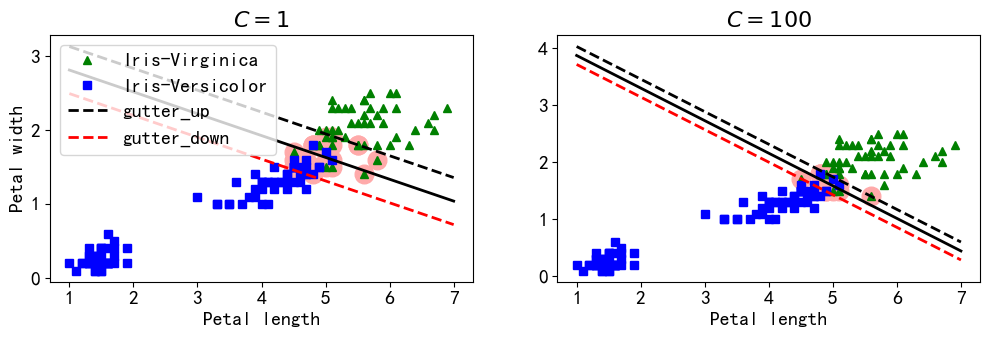

In [18]:
#设置图片大小
plt.figure(figsize=(12,3.2))

#绘制图片1
plt.subplot(121)
#将数据集中的点表示出来
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 1, 7)#调用svm_clf1进行画图

#画出图像的其他属性，x轴，y轴的名字，图注的位置和大小，图标的名字
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)

#绘制图片2
plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 1, 7)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)

In [17]:
# 创造一个（-4,4）中间有九个点的等差数列，
#reshape(-1,1)意为将其转换为一列，不管它有多少行
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
# 垂直堆叠
X2D = np.c_[X1D, X1D**2]
# 类别
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
#绘制图片的大小
plt.figure(figsize=(10, 3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

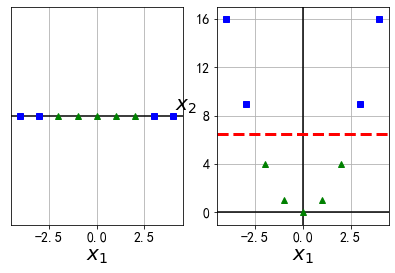

In [18]:
#第一张图片
plt.subplot(121)
plt.grid(True, which='both')#显示网格，
#which：网格线显示的尺度。字符串，可选参数，取值范围为{'major', 'minor', 'both'}，
# 默认为'both'。'major'为主刻度、'minor'为次刻度。
# 画y=0水平线
plt.axhline(y=0, color='k')
#画出数据点
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
# 设置y轴不标注
plt.gca().get_yaxis().set_ticks([])
#设置x轴的名称
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

#绘制第二张图
plt.subplot(122)
plt.grid(True, which='both')
#画出两条黑色的线
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
#画出数据集的点
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
#设置坐标轴的名字
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])#设置y轴的刻度
#自定义一根红线
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])
#调整两幅图的间距
plt.subplots_adjust(right=1)

#save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

## 2. 非线性分类器

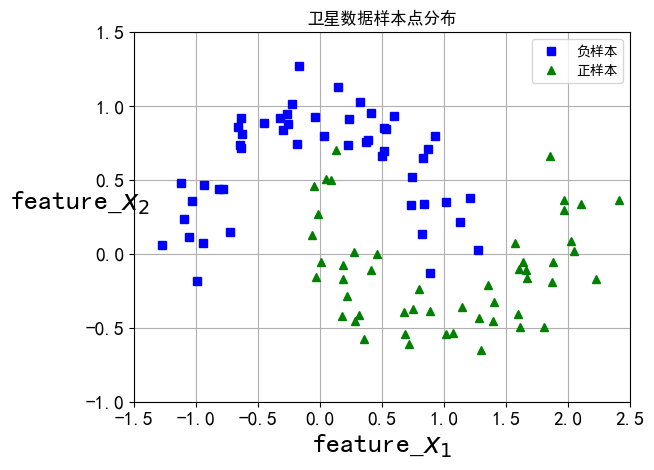

((100, 2), (100,))

In [77]:
from sklearn.datasets import make_moons
data_moons_X, data_moons_y = make_moons(n_samples=100, noise=0.15, random_state=42)
#只取出卫星数据集的100个点，加入0.15的高斯噪声
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
# import sklearn.datasets as sds
# dir(sds)  # 查看sklearn所有数据集

#可视化数据集
def plot_dataset(X, y, axes):
    #画出样本点
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="负样本") # 负样本点
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="正样本") # 正样本点
    
    plt.axis(axes)  # 坐标轴范围
    plt.grid(True, which='both')  # 网格线
    
    #画出坐标轴
    plt.xlabel(r"feature_$x_1$", fontsize=20)
    plt.ylabel(r"feature_$x_2$", fontsize=20, rotation=0)
    
    # 设置图例
    plt.legend()
    # 图形标题
    plt.title("卫星数据样本点分布")

plot_dataset(data_moons_X, data_moons_y, [-1.5, 2.5, -1, 1.5])
plt.show()
X.shape,y.shape

### 2.1 训练模型

In [78]:
from sklearn.datasets import make_moons #生成数据
from sklearn.pipeline import Pipeline #建立通道流
from sklearn.preprocessing import PolynomialFeatures #调用多项式核函数

# 创建SVM模型
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10)),# 多项式核函数，维度为10维
        ("scaler", StandardScaler()),#标准化处理
        ("svm_clf", LinearSVC(C=10, max_iter=5000,loss="hinge", random_state=42))#使用线性模型
    ])

# 模型训练
polynomial_svm_clf.fit(data_moons_X, data_moons_y) 

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=10)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=5000,
                           random_state=42))])

### 2.2 分界线

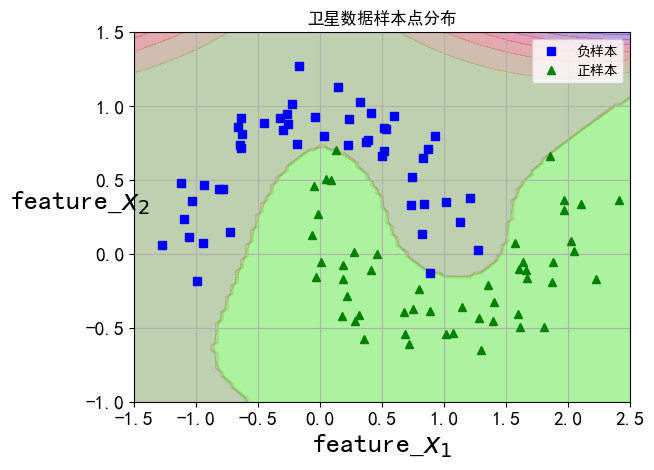

In [87]:
# 画出分界线
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) #在axes[0], axes[1]之间生成100值的等差数列
    x1s = np.linspace(axes[2], axes[3], 100) #在axes[2], axes[3]之间生成100值的等差数列
    
    #画出网格点
    x0, x1 = np.meshgrid(x0s, x1s)#np.meshgrid 从坐标向量中返回坐标矩阵
#     print('x0 =',x0.shape, x0) #(100, 100)   100个相同行，每行100
#     print('x1 =',x1.shape, x1) # (100, 100) 
   
    X = np.c_[x0.ravel(), x1.ravel()]#将多维数组降到一维,并按列连接
#     print("X =", X.shape, X)  # (10000, 2)
    
    y_pred = clf.predict(X).reshape(x0.shape)  
    # 计算样本点到分割超平面的函数距离
    y_decision = clf.decision_function(X).reshape(x0.shape)  
    
#     画出对网格点预测结果的等高线，alpha是透明度
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.1)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.3)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])  # 画出分界线
plot_dataset(data_moons_X, data_moons_y, [-1.5, 2.5, -1, 1.5]) # 绘制卫星数据集样本点

plt.show()

In [22]:
# 使用SVC来作为SVM分类器函数
from sklearn.svm import SVC
#训练模型1
# 选择多项式核函数，最高项为3，常数项为1，惩罚参数为5
poly_kernel_svm_clf = Pipeline([
        # 先标准化数据
        ("scaler", StandardScaler()),
        # 选择核函数为poly，即多项式核函数
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1,C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
#训练模型2
# 选择多项式核函数，最高项为10，常数项为100，惩罚参数为5
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)
#模型1和模型2的区别在入coef0不一样

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

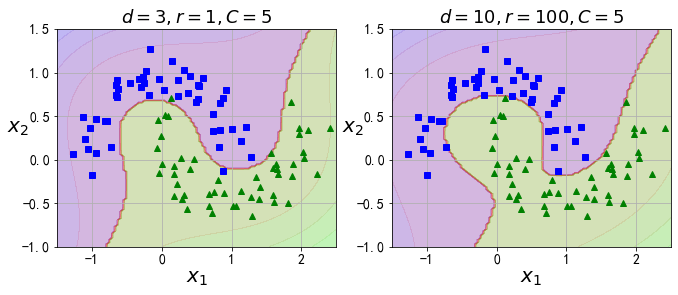

In [24]:
# 设置图幅的宽高
plt.figure(figsize=(11, 4))
#图1 最高项为3，常数项为1，惩罚参数为5
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

#图2 最高项为10，常数项为00，惩罚参数为5
plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

In [44]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3#定义伽马为0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)#将[−4.5,4.5]之间均匀分成200个点，并变成一维数组
#两个位置，添加高斯核
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]#组合数据，将距离坐标展示出来
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])#设置标签
#开始绘图
plt.figure(figsize=(10.5, 4))

<Figure size 756x288 with 0 Axes>

<Figure size 756x288 with 0 Axes>

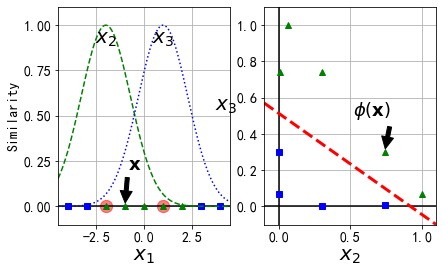

In [47]:
#图1
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")#数组，数组的大小，透明度，颜色
#画出点
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")#蓝色的方块
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")#绿色的三角
#画线
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])#标注y轴的刻度
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

#画图2
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
#画出所有的点
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

#save_fig("kernel_method_plot")
plt.show()


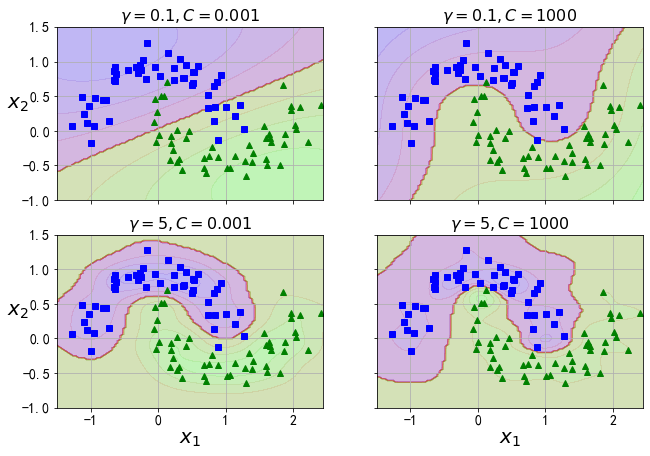

In [48]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))#使用的核函数不一样
    ])
rbf_kernel_svm_clf.fit(X, y)
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)#hyperparams有4种情况

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))#选取不同的c和伽马
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)
#循环作图
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])#设置图标的位置（//表示商，%表示余数）
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

#save_fig("moons_rbf_svc_plot")
plt.show()